In [22]:
loss_list_ResNetGlobalLSTM = []
loss_list_ResNetGlobalGRU = []
loss_list_VGG19GlobalLSTM = []
loss_list_VGG19GlobalGRU = []

In [1]:
from model import MyModel
from torch.optim import Adam,RMSprop,SGD,ASGD,Adagrad
import lib
from dataSet import get_data_loader
import torch.nn as nn
import torch
from dataSet import show_image,PAD_IDX,VOCAB_DIM
import matplotlib.pyplot as plt



def save_model(model,epochs,model_name):
    """
    This function saves the model's parameters
    :param model:
    :param epoch:
    :return:
    """
    model_param = {
        "epochs":epochs,
        "vocab_size":VOCAB_DIM,
        "embed_size":lib.EMBED_DIM,
        "encoder_dim":lib.ENCODER_DIM,
        "decoder_dim":lib.DECODER_DIM,
        "attention_dim":lib.ATTENTION_DIM,
        "model_state_dict":model.state_dict()
    }

    torch.save(model_param,"./模型存放/{}.pkl".format(model_name))


def evaluation(epoch,model,model_name,loss_list,display_steps=20):
    """
    This function serves to dynamically evaluate the model's performance.
    :param epoch:
    :param display_steps:
    :return:
    """

    for idx, (image, targets) in enumerate(get_data_loader(train=True)):
        # image [batch_size,seq_len,encoder_dim]
        # targets [batch_size,max_len]

        image, targets = image.to(lib.DEVICE), targets.to(lib.DEVICE)

        optimizer.zero_grad()

        # outputs [batch_size,seq_len,vocab_size]
        outputs, attention_weights = model(image, targets)

        target = targets[:, 1:]  # 取<SOS>之后的文本序列,target [batch_size,seq_len]

        # 计算一个batch上的交叉损失，用于backpropagation
        l = criterion_metrics(outputs.view(-1, VOCAB_DIM), target.reshape(-1))

        l.backward()

        optimizer.step()

        if (idx + 1) % (display_steps) == 0:
            print("Epoch: {} training loss: {:.5f}".format(epoch + 1, l.item()))
            loss_list.append(l.item())
            # 切换成评估模式(忽略dropout)
            seq2seq.eval()
            with torch.no_grad():
                data_loader = iter(get_data_loader(train=False))
                image, caption = next(data_loader)
                image_features = seq2seq.encoder(image[0:1].to(lib.DEVICE))
                target_caption = caption[0]

                captions_result, attention_weights = seq2seq.decoder \
                    .generate_caption(image_features)

                outputs,_ = seq2seq(image[0:1].to(lib.DEVICE),target_caption.to(lib.DEVICE))

                testing_loss = criterion_metrics(outputs.view(-1,VOCAB_DIM),target.reshape(-1))
                print("Epoch: {} testing loss: {:.5f}".format(epoch+1,testing_loss.item()))

                sentence = " ".join(captions_result)

                show_image(image[0], label=sentence)
            seq2seq.train()
        save_model(seq2seq,epoch,model_name)

ModuleNotFoundError: No module named 'torchvision'

In [24]:
#ResNetGlobalLSTM
seq2seq = MyModel().to(lib.DEVICE)


optimizer = Adam(seq2seq.parameters(),lr=lib.LEARNING_RATE)


criterion_metrics = nn.CrossEntropyLoss(ignore_index=PAD_IDX)

Epoch: 1 loss: 4.65604


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


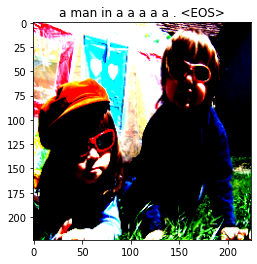

Epoch: 1 loss: 4.27262


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


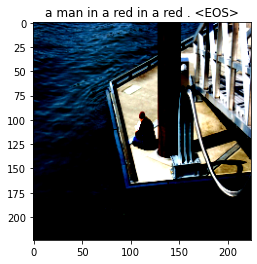

Epoch: 1 loss: 4.00865


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


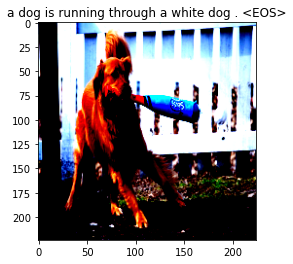

Epoch: 1 loss: 3.86078


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


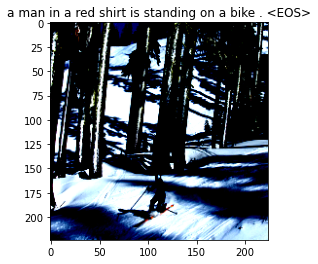

Epoch: 1 loss: 3.50583


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


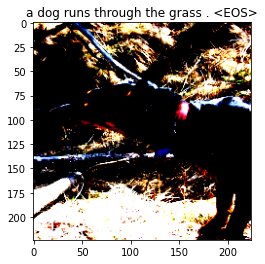

Epoch: 1 loss: 3.53502


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


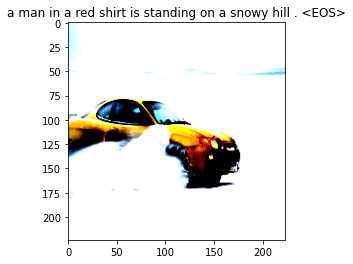

Epoch: 2 loss: 3.31697


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


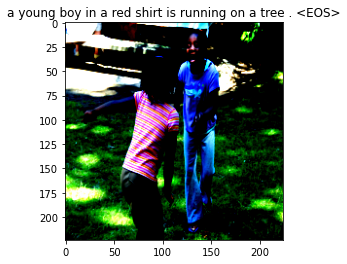

Epoch: 2 loss: 3.30403


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


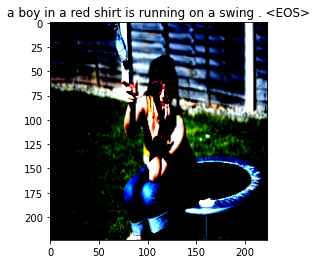

Epoch: 2 loss: 3.25206


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


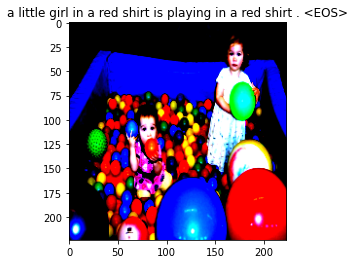

Epoch: 2 loss: 3.15062


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


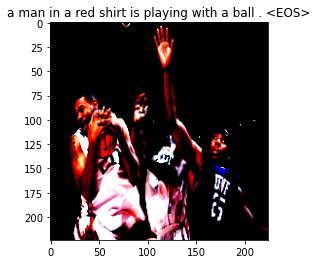

Epoch: 2 loss: 3.18594


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


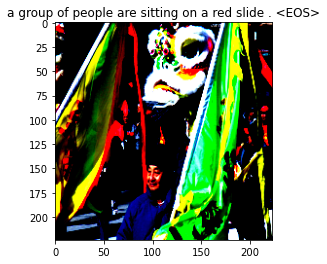

Epoch: 2 loss: 3.14895


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


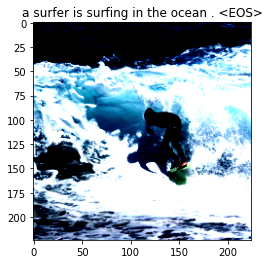

Wall time: 26min 36s


In [25]:
%%time
for i in range(2):
    evaluation(i,"ResNetGlobalLSTM",loss_list_ResNetGlobalLSTM,50)

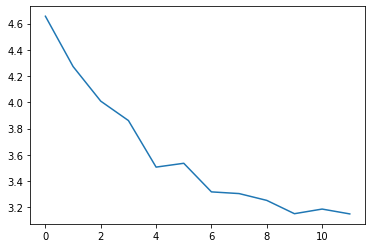

In [27]:
plt.plot(list(range(len(loss_list_ResNetGlobalLSTM))),loss_list_ResNetGlobalLSTM,)

In [2]:
#ResNetGlobalLSTM
ResNetLocalLSTM = MyModel(attention_dim=lib.ATTENTION_DIM,attention_type="local").to(lib.DEVICE)


optimizer = Adam(ResNetLocalLSTM.parameters(),lr=lib.LEARNING_RATE)


criterion_metrics = nn.CrossEntropyLoss(ignore_index=PAD_IDX)

Epoch: 1 loss: 5.00777


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


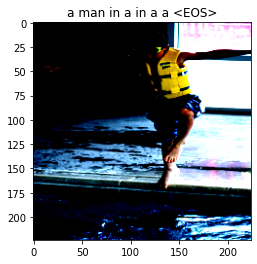

Epoch: 1 loss: 4.55307


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


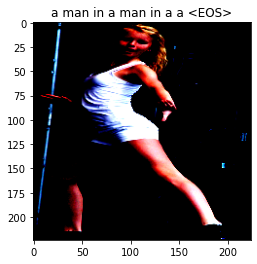

Epoch: 1 loss: 4.32247


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


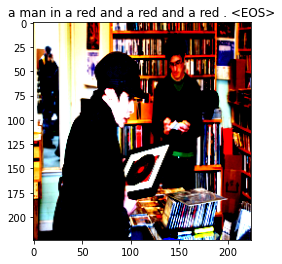

Epoch: 1 loss: 4.05863


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


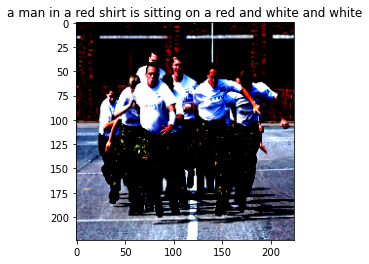

Epoch: 1 loss: 3.82019


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


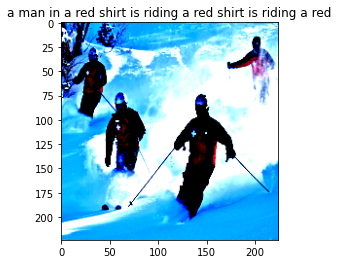

Epoch: 1 loss: 3.71757


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


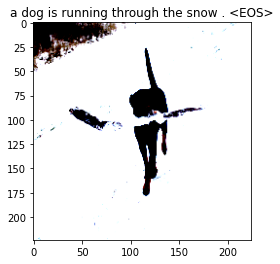

Epoch: 2 loss: 3.41031


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


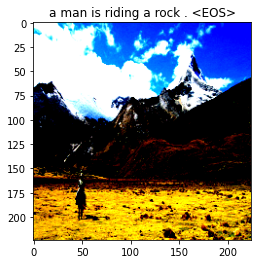

Epoch: 2 loss: 3.37737


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


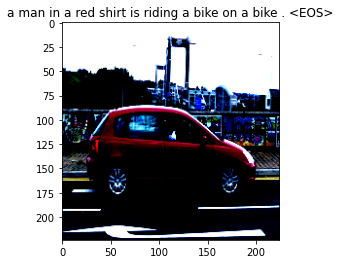

Epoch: 2 loss: 3.39539


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


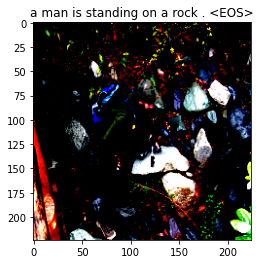

Epoch: 2 loss: 3.35723


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


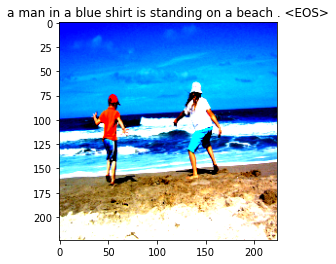

Epoch: 2 loss: 3.27427


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


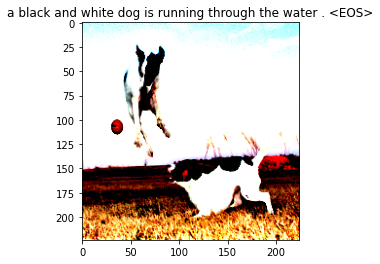

Epoch: 2 loss: 3.11819


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


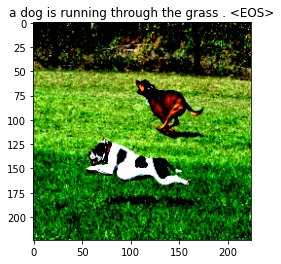

Wall time: 23min 27s


In [3]:
%%time
loss_list_ResNetLocalLSTM = []
for i in range(2):
    evaluation(i,ResNetLocalLSTM,"ResNetLocalLSTM",loss_list_ResNetLocalLSTM,50)
    

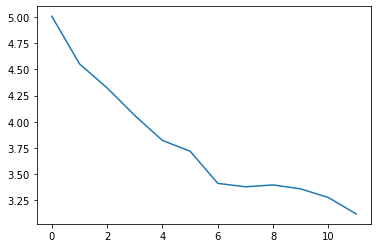

In [6]:
plt.plot(list(range(len(loss_list_ResNetLocalLSTM))),loss_list_ResNetLocalLSTM)

In [9]:
#ResNetGlobalGRU
ResNetGlobalGRU = MyModel(GRU=True).to(lib.DEVICE)


optimizer = Adam(ResNetGlobalGRU.parameters(),lr=lib.LEARNING_RATE)


criterion_metrics = nn.CrossEntropyLoss(ignore_index=PAD_IDX)

Epoch: 1 loss: 4.21763


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


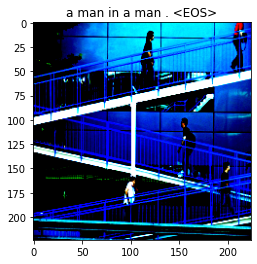

Epoch: 1 loss: 3.94793


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


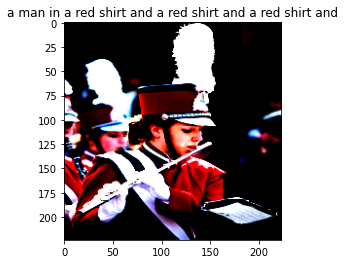

Epoch: 1 loss: 3.79919


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


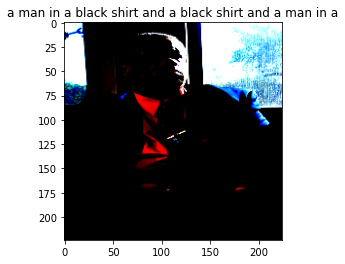

Epoch: 1 loss: 3.59018


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


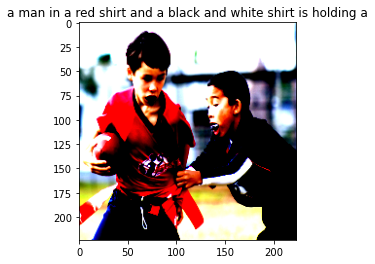

Epoch: 1 loss: 3.45359


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


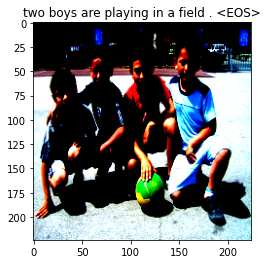

Epoch: 1 loss: 3.44594


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


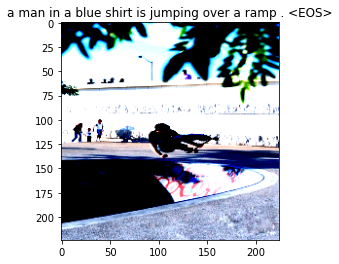

Epoch: 2 loss: 3.11224


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


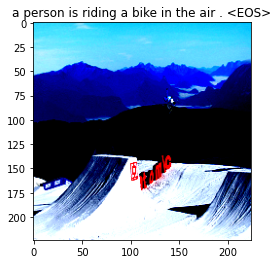

Epoch: 2 loss: 3.10562


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


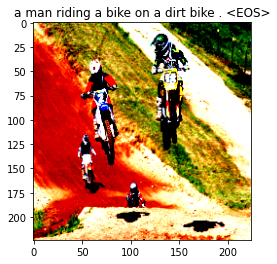

Epoch: 2 loss: 3.08520


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


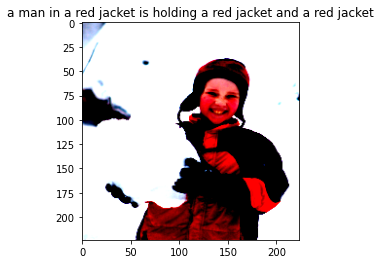

Epoch: 2 loss: 2.94032


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


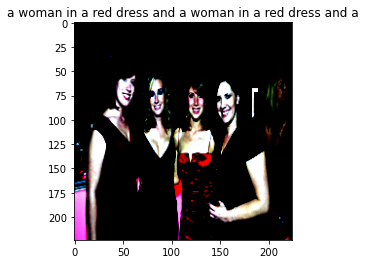

Epoch: 2 loss: 3.12574


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


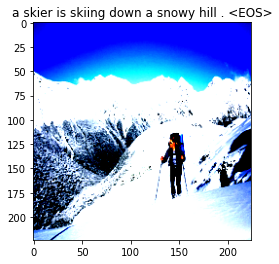

Epoch: 2 loss: 3.01681


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


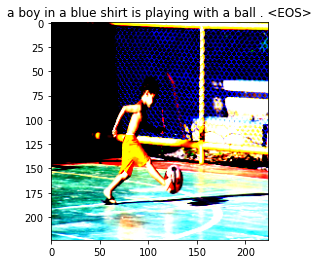

Wall time: 26min 59s


In [10]:
%%time
loss_list_ResNetGlobalGRU = []
for i in range(2):
    evaluation(i,ResNetGlobalGRU,"ResNetGlobalGRU",loss_list_ResNetGlobalGRU,50)
    

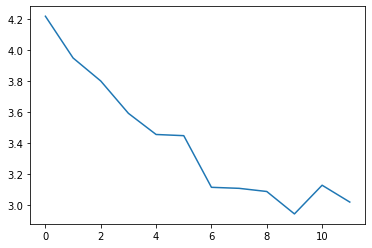

In [11]:
plt.plot(list(range(len(loss_list_ResNetGlobalGRU))),loss_list_ResNetGlobalGRU)

In [2]:
#ResNetLocalGRU
ResNetLocalGRU = MyModel(GRU=True,attention_dim=lib.ATTENTION_DIM,attention_type="local").to(lib.DEVICE)


optimizer = Adam(ResNetLocalGRU.parameters(),lr=lib.LEARNING_RATE)


criterion_metrics = nn.CrossEntropyLoss(ignore_index=PAD_IDX)

Epoch: 1 loss: 4.44062


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


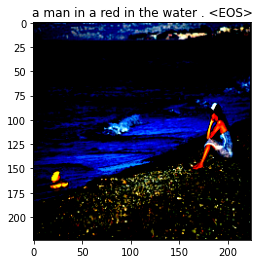

Epoch: 1 loss: 3.93827


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


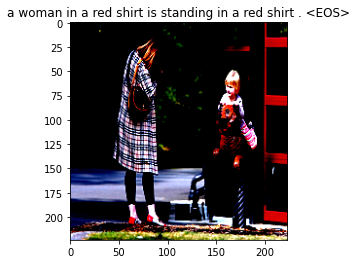

Epoch: 1 loss: 3.57694


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


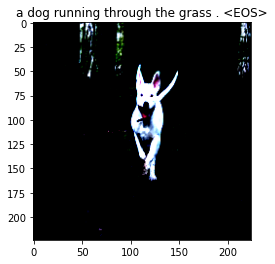

Epoch: 1 loss: 3.53725


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


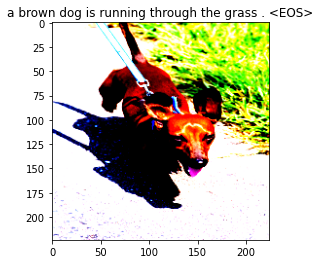

Epoch: 1 loss: 3.37898


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


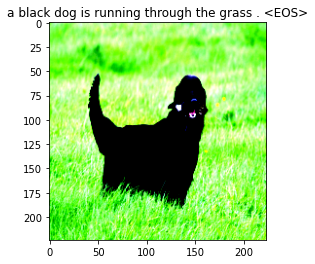

Epoch: 1 loss: 3.34648


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


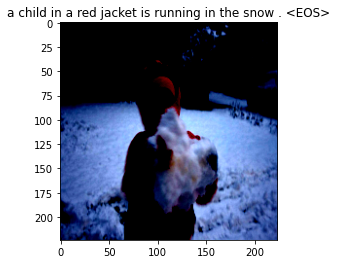

Epoch: 2 loss: 3.25525


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


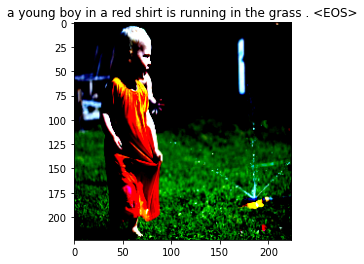

Epoch: 2 loss: 3.16007


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


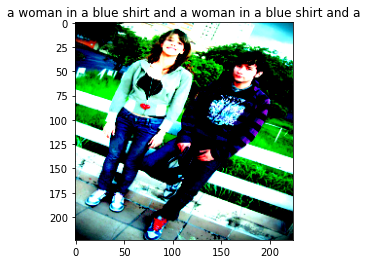

Epoch: 2 loss: 3.01848


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


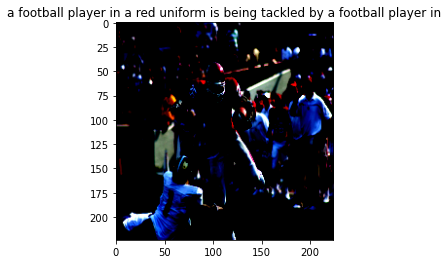

Epoch: 2 loss: 2.98869


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


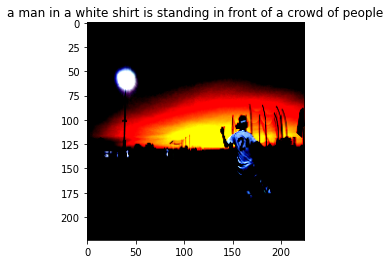

Epoch: 2 loss: 2.93747


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


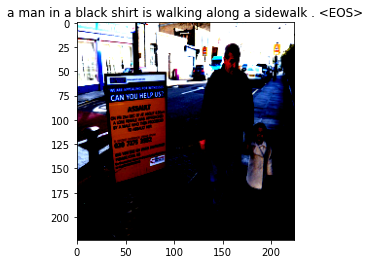

Epoch: 2 loss: 3.06603


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


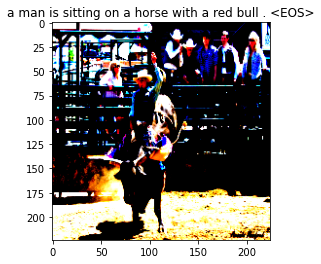

Wall time: 23min 30s


In [3]:
%%time
loss_list_ResNetLocalGRU=[]
for i in range(2):
    evaluation(i,ResNetLocalGRU,"ResNetLocalGRU",loss_list_ResNetLocalGRU,50)
    

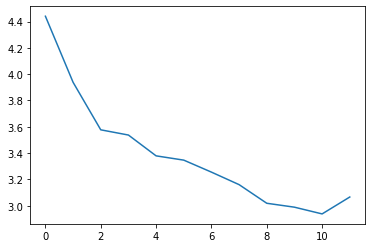

In [4]:
plt.plot(list(range(len(loss_list_ResNetLocalGRU))),loss_list_ResNetLocalGRU)